## Intervalos de confiança

- introdução:

Exemplo 1:

Intervalo de confiança para distribuição Normal com variância desconhecida

1) O tempo de reação de um novo medicamento pode ser considerado como tendo distribuição Normal e deseja-se fazer inferência sobre a média que é desconhecida obtendo um intervalo de confiança. Vinte pacientes foram sorteados e tiveram seu tempo de reação anotado. Os dados foram os seguintes (em minutos):



| 2.9 | 3.4 | 3.5 | 4.1 | 4.6 | 4.7 | 4.5 | 3.8 | 5.3 | 4.9 |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 4.8 | 5.7 | 5.8 | 5.0 | 3.4 | 5.9 | 6.3 | 4.6 | 5.5 | 6.2 |

In [5]:
# Dados da tebela
valores = [
    2.9, 3.4, 3.5, 4.1, 4.6, 4.7, 4.5, 3.8, 5.3, 4.9,
    4.8, 5.7, 5.8, 5.0, 3.4, 5.9, 6.3, 4.6, 5.5, 6.2
]


Sabemos que o intervalo de confiança para normal com a variância desconhecida é dado por:

$$
(\bar{x}-T_{t}\sqrt{\frac{S^2}{n}};\bar{x}+T_{t}\sqrt{\frac{S^2}{n}})
$$

onde t é o quantil de ordem 1 - α∕2 da distribuição t de Student, com n - 1 graus de liberdade.

In [2]:
# Importando bibliotecas necessárias
from scipy.stats import t                  # Distribuição t de Student para calcular os quantis
import statistics as est                   # Biblioteca para média e variância
import math                                # Biblioteca matemática para raiz quadrada

# Função para calcular o intervalo de confiança usando distribuição t de Student
def IC_t(X = None, conf = 0.95):
    n = len(X)                             # Tamanho da amostra
    media = est.mean(X)                    # Média da amostra
    variancia = est.variance(X)            # Variância amostral (corrigida por padrão)
    
    # Cálculo dos quantis da t de Student (inferior e superior)
    quantis = [
        t.ppf((1 - conf)/2, df = n - 1),           # Quantil inferior
        t.ppf((1 - (1 - conf)/2), df = n - 1)      # Quantil superior
    ]
    
    # Cálculo do intervalo de confiança
    # fórmula: média ± t * (desvio padrão / √n)
    ic = (
        round(media + quantis[0]*math.sqrt(variancia/n), 6),   # Limite inferior
        round(media + quantis[1]*math.sqrt(variancia/n), 6)    # Limite superior
    )
    
    return ic  # Retorna o intervalo de confiança como uma tupla



In [3]:
# intervalo de confiança padrão(95%):
IC_t(valores)

(np.float64(4.278843), np.float64(5.211157))

In [4]:
# intervalo de confiança de 99%
IC_t(valores, 0.99)

(np.float64(4.107814), np.float64(5.382186))

## Intervalos de confiança e função de verossimilhaça

#### Inferência estatística para distribuição bernoulli

Os dados abaixo são uma amostra aleatória da distribuição Bernoulli(p).

0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1

a) o gráfico da função de verossimilhança para p com base nestes dados

In [7]:
# dados 
amostra_bernoulli = (0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1)

In [8]:
# Importando bibliotecas
import matplotlib.pyplot as plt           # Para geração de gráficos
from scipy.stats import binom             # Distribuição binomial
import numpy as np                        # Para manipulação de arrays e números
import statistics as est                  # Para cálculo da média

# Função auxiliar que retorna uma lista de 1 até a soma dos dados
def Contador(dados):
    return [i for i in range(1, sum(dados))]  # Retorna uma sequência de inteiros de 1 até a soma

# Função para construir o gráfico de verossimilhança da distribuição binomial
def plot(dados):
    p_vals = np.arange(0, 1, 0.01, dtype=float)  # Sequência de valores de p de 0 a 1 com passo de 0.01
    resultados = []                              # Lista para armazenar os log-verossimilhanças
    p_estimador = est.mean(dados)                # Estimador da proporção de sucessos (média amostral)
    
    # Configuração da figura
    fig, ax = plt.subplots(figsize=(8, 6))

    for p in p_vals:
        # Calcula a log-verossimilhança para cada valor de p com base nos dados
        resultados.append(binom.logpmf(sum(dados), len(dados), p))

    # Plota o gráfico da função de log-verossimilhança
    ax.axvline(p_estimador, ls='--', color='r', label=f'$\hat{{p}} = {p_estimador:.2f}$')  # Linha vertical na estimativa
    plt.legend()                                           # Mostra legenda
    plt.plot(p_vals, resultados)                           # Plota a curva
    plt.xlabel("p (probabilidade de sucesso)")             # Rótulo do eixo x
    plt.ylabel("Log-Verossimilhança")                      # Rótulo do eixo y
    plt.title("Gráfico de Verossimilhança - Distribuição Binomial")  # Título do gráfico
    plt.grid(True)                                         # Ativa a grade
    plt.show()                                             # Exibe o gráfico

<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Mateus\AppData\Local\Temp\ipykernel_10176\1908507874.py:25: SyntaxWarning: invalid escape sequence '\h'
  ax.axvline(p_estimador, ls='--', color='r', label=f'$\hat{{p}} = {p_estimador:.2f}$')  # Linha vertical na estimativa


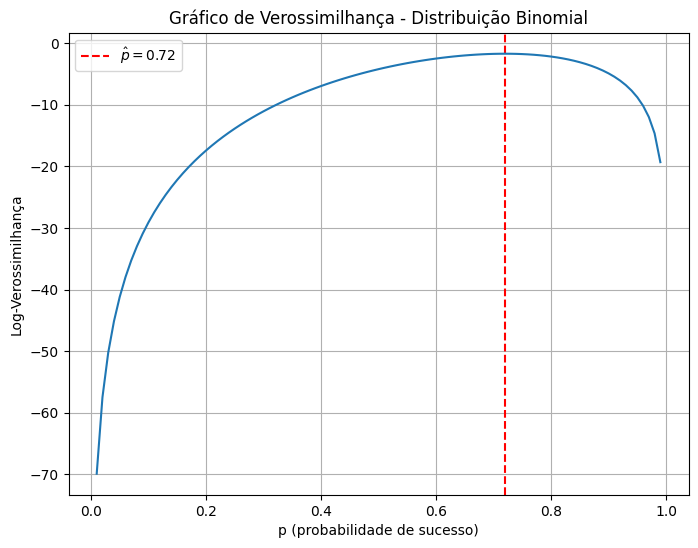

In [9]:
plot(amostra_bernoulli)

(b) o estimador de máxima verossimilhança de p, a informação observada e a informação de Fisher

Dos resultados para distribuição Bernoulli sabemos que o estimador de máxima verossimilhança é dado por

$
T =\frac{\sum_{i = 1}^{n}y_{i}}{n}
$

e que a informação esperada coincide com a informação observada e sendo iguais a:

$
I(T) = \frac{n}{T(1-T)}
$

In [10]:
# Função para calcular o valor de n / (p * (1 - p)), usada para simplificar o desvio padrão da proporção
def io(dados):
    y = est.mean(dados)              # Calcula a proporção de sucessos (p̂)
    return len(dados) / (y * (1 - y))  # Retorna n / (p̂ * (1 - p̂)), que é o inverso da variância do estimador

In [11]:
round(io(amostra_bernoulli),4)

124.0079

(c) um intervalo de confiança de 95% para p baseado na normalidade assintótica de T

O intervalo de confiança baseado na normalidade assintótica do estimador de máxima verossimilhança é dado por:

$$
(T - z_{\alpha/2}\sqrt{I(T)}; T + z_{\alpha/2}\sqrt{I(T)})
$$

In [12]:
from scipy.stats import norm      # Importa a normal padrão para obter quantis
import statistics as est          # Importa funções estatísticas como média
import math                       # Importa funções matemáticas

# Função para construir intervalo de confiança para uma proporção binomial (método normal aproximado)
def IC_binom_assintotico(dados = None, conf = 0.95):
    # Obtém os quantis da normal padrão para o nível de confiança desejado
    quantis = [norm.ppf((1-conf)/2), norm.ppf(1 - (1-conf)/2)]

    # Calcula a proporção amostral (estimador de p)
    p_estimador = est.mean(dados)

    # Retorna o intervalo de confiança aproximado para p
    return (
        p_estimador + quantis[0] * math.sqrt(1 / io(dados)),  # Limite inferior
        p_estimador + quantis[1] * math.sqrt(1 / io(dados))   # Limite superior
    )


In [13]:
IC_binom_assintotico(amostra_bernoulli)

(np.float64(0.5439956707064356), np.float64(0.8960043292935643))

(d) compare o intervalo obtido em (b) com um intervalo de confiança de 95% obtido com base na distribuição limite da função deviance


Vamos agora obter e mostrar em um gráfico o intervalo baseado na função deviance. Lembrando que a deviance é definida pela expressão

$$
D(p) = 2\{T - l(T)\}
$$

In [14]:
# Função para calcular a Deviância para a distribuição Binomial
def DevBinomial(dados = None, p = None):
    # Estimador da proporção de sucessos (média amostral)
    p_estimador = sum(dados) / len(dados)
    
    # Calculando a log-verossimilhança do modelo ajustado com o estimador p_estimador
    modelo_ajustado = binom.logpmf(sum(dados), len(dados), p_estimador)
    
    # Calculando a log-verossimilhança do modelo com a probabilidade fornecida p
    modelo_log = binom.logpmf(sum(dados), len(dados), p)
    
    # Calculando a deviância como 2 vezes a diferença entre as log-verossimilhanças
    dev = 2 * (modelo_ajustado - modelo_log)
    
    return dev  # Retorna a deviância

In [15]:
DevBinomial(amostra_bernoulli,p=0.3511),DevBinomial(amostra_bernoulli,p=0.95)

(np.float64(14.08763837967549), np.float64(14.139144555333957))

In [16]:
# importações
from scipy.stats import chi2    # distribuição Qui-Quadrado
from scipy.optimize import root_scalar

# Função para calcular a função de limite de deviância
def Lim(x, dados, q):
    # Calcula a deviância para um valor x e verifica se ela é maior que o valor crítico da chi-quadrado
    return DevBinomial(dados, x) - q

# Função para calcular o intervalo de confiança com base na deviância
def IC_dev(dados):
    # Estimador de p, que é a média dos dados
    p_estimador = sum(dados) / len(dados)
    
    # Calcula o limite inferior do intervalo de confiança utilizando o método de bisseção
    inf = root_scalar(Lim, args=(dados, chi2.ppf(0.95, df=1)), bracket=[0, p_estimador], method='bisect').root
    
    # Calcula o limite superior do intervalo de confiança utilizando o método de bisseção
    sup = root_scalar(Lim, args=(dados, chi2.ppf(0.95, df=1)), bracket=[p_estimador, 1], method='bisect').root
    
    # Retorna os limites inferior e superior do intervalo com 7 casas decimais
    return round(inf, 7), round(sup, 7)


In [17]:
def IC_Binom_plot(dados = None, inf = None, sup = None):
    # Verifica se o intervalo está bem definido
    if inf < sup:
        # Linha de referência: quantil 95% da distribuição qui-quadrado com 1 grau de liberdade
        linha = chi2.ppf(0.95, df=1)

        # Gera 100 pontos entre inf e sup
        x = np.linspace(inf, sup, 100)
        y = []

        # Calcula os valores da função DevBinomial para cada ponto de x
        for i in x:
            y.append(DevBinomial(dados, i))

        # Cria a figura e os eixos para o gráfico
        fig, ax = plt.subplots(figsize=(8,6))

        # Linha horizontal indicando o valor crítico da qui-quadrado
        ax.axhline(linha, ls='--', color='r')

        # Linhas verticais indicando o intervalo de confiança da função de desvio
        ax.axvline(IC_dev(dados)[0], ls='--', color='r')
        ax.axvline(IC_dev(dados)[1], ls='--', color='r')

        # Plota a curva y = DevBinomial(dados, x)
        plt.plot(x, y)

        # Adiciona grade no gráfico
        plt.grid(True)

        # Mostra o gráfico
        plt.show()
    else:
        # Retorna mensagem de erro se o intervalo estiver invertido
        return 'inf deve ser menor que sup'


In [18]:
IC_dev(amostra_bernoulli)

(0.5283499, 0.8686704)

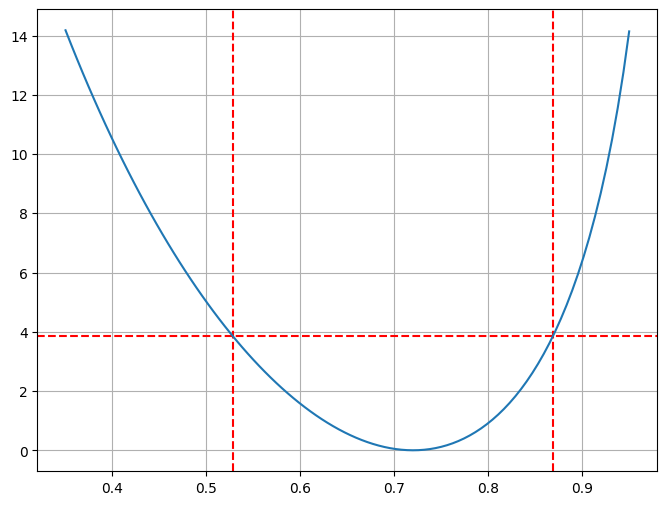

In [19]:
IC_Binom_plot(amostra_bernoulli,0.35,0.95)

In [20]:
# Criando uma função geral para determinar o intervalo de confiança
def IC_Binom(dados = None, tipo = "assintotico", nivel = 0.95):

    # Se o tipo for "assintotico", chama a função que calcula IC pelo método assintótico
    if tipo.lower() == "assintotico":
        return IC_binom_assintotico(dados, nivel)

    # Se o tipo for "deviance", chama a função que calcula IC via desvio (dev)
    elif tipo.lower() == "deviance":
        return IC_dev(dados)

In [21]:
# método assintotico
IC_Binom(amostra_bernoulli)

(np.float64(0.5439956707064356), np.float64(0.8960043292935643))

In [22]:
# método deviance
IC_Binom(amostra_bernoulli,tipo = "deviance")

(0.5283499, 0.8686704)